In [ ]:
'''
METHOD 0: simplest possible method to create "silly synonyms":
    - take the objectively ranked funniest words in the paper (Engelthaler & Hills 2017) {this paper has 5000 words
        with humor ratings decided by humans}
    - then, you can use GloVe + nearest neighbor search algorithms, to figure out which of these top-ranked words
        correlate most strongly with the word you're aiming for.
        
    {^^ these two methods together would generate "silly synonyms" for a given word.}
        
        *** you could fill in a target word meaning using an inverse-skipgram from news headlines ***

'''

# need to upload the "funny words" file

# need to upload GloVe vectors. (Use the "common crawl" GloVe vectors)



In [ ]:
# mount drive first.
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2020-12-01 21:50:52--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2020-12-01 21:50:52--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2020-12-01 21:50:52--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [ ]:
# !ls gdrive/MyDrive
# !mv 'glove.840B.300d.zip.1' gdrive/MyDrive/

# let's extract the files here.

#!ls gdrive/MyDrive/humor_generation/datasets
!unzip 'gdrive/MyDrive/humor_generation/datasets/glove.840B.300d.zip.1' -d 'gdrive/MyDrive/humor_generation/datasets/'

Archive:  gdrive/MyDrive/humor_generation/datasets/glove.840B.300d.zip.1
  inflating: glove.840B.300d.txt     


In [ ]:
# !mv 'glove.840B.300d.txt' gdrive/MyDrive/humor_generation/datasets
!ls 'gdrive/MyDrive/humor_generation/datasets'

bert_training		       news-headlines-humor.csv
glove.840B.300d.txt	       news-headlines-humor.gsheet
glove.840B.300d.zip.1	       news-headlines-humor-parsed.csv
humorous_words_dataset.csv     news-headlines-humor-parsed.gsheet
News_Category_Dataset_v2.json


# Silly Synonym Code

The below code should open up GloVe, along with silly words, and find the silliest synonym words of the target words.

*Todo: we should make this into a proper pipeline*

In [ ]:
## STEP 1: Pull in and use the GloVe dataset.

import numpy as np

emb_dict = {}
with open('gdrive/MyDrive/humor_generation/datasets/glove.840B.300d.txt', 'r') as fglove:
  for line in fglove:
    lvals = line.split(' ')
    word = lvals[0]
    vec = np.array(lvals[1:], dtype='float32')
    emb_dict[word] = vec


In [ ]:
## STEP 2: Create a subset of the GloVe vectors belonging to the ranked "humorous" words.

import pandas as pd
import csv
# first, open up & read out the set of ranked words
with open('gdrive/MyDrive/humor_generation/datasets/humorous_words_dataset.csv', 'r') as fhumwds:
  hum_df = pd.read_csv(fhumwds)

hum_wds = hum_df['word'].tolist()
print(hum_wds[:5])

#create a dictionary of humorous word embeddings
hum_embs = {}
ctr = 0
for h in hum_wds:
  # extract certain values from the glove embedding dict.
  e = emb_dict.get(h)
  if e is not None:
    hum_embs[h] = e
  if ctr <= 10:
    ctr +=1
    print(h)
    print(e)

#practice using iloc to find the proper humor score of a given word.
print(hum_df[hum_df['word'] == 'break'])
hum_df[hum_df['word'] == 'break'].iloc[0,1]

# create dictionary mapping word to humor score.
hum_scores = {}
for w in hum_wds:
  # find the humor score.
  hscore = hum_df[hum_df['word'] == w].iloc[0,1]
  hum_scores[w] = hscore

print("adder:", hum_scores['adder'])
print("break:", hum_scores['break'])

['abbey', 'abode', 'abscess', 'absence', 'abstract']
abbey
[ 1.6359e-01  4.5962e-02 -2.2557e-01 -3.1920e-01 -2.3298e-01  5.9102e-02
 -4.2180e-01  4.1163e-01 -1.4784e-02  9.0087e-01  3.5554e-01 -6.0967e-01
 -7.9768e-02 -4.0775e-02  2.9183e-01  2.4038e-01  3.1772e-01  1.8874e-01
  9.6847e-01  1.7278e-01  9.1562e-01  1.5206e-01  3.3659e-01  6.7176e-02
 -3.6633e-01  1.5070e-01 -4.9766e-01  1.2382e-01 -2.7833e-01  6.7479e-01
  6.3012e-01  2.4832e-01  6.8048e-01  1.0886e-01 -5.0203e-02  2.3168e-01
 -4.3120e-01 -4.8284e-01  1.0654e-01  3.8452e-01  1.9225e-01 -1.6617e-01
  5.2580e-01  7.5051e-01  4.6562e-01  3.5566e-01  1.9428e-02 -1.1664e-01
 -2.6068e-01  1.0488e-01  2.1456e-01 -2.2156e-01 -3.0000e-01  3.0171e-01
  5.3701e-01 -2.5079e-01  1.8569e-01  1.9778e-01  3.3088e-01  5.3984e-01
 -2.8682e-01 -3.0911e-01  3.0495e-01  3.1765e-01 -6.4984e-01  9.2807e-01
  5.4901e-02 -2.0847e-03 -4.0680e-01  1.9375e-01 -1.1787e-01 -1.8042e-01
  1.3448e-01  2.9908e-01  7.7293e-01 -2.5507e-01 -1.6407e-02  2.9

In [ ]:
## STEP 3: Define a function to generate "silly synonyms" for a given input word, using the above data structures.

from scipy import spatial

# special function to find nearest neighbors
def find_closest_embeddings(embedding, emb_dict, threshold=20):
    closest_wds = sorted(emb_dict.keys(), key=lambda word: spatial.distance.euclidean(emb_dict[word], embedding))
    closest_wds = closest_wds[:20]
    closest_wds_dists = [(word, spatial.distance.euclidean(emb_dict[word], embedding)) for word in closest_wds]
    return closest_wds_dists

'''
  silly synonyms function: 
    1. find the glove embedding of the words.
    2. rank the words by similarity, and pick the top 20-40?
    3. re-shuffle the words, and rank them by humor.
'''

def find_silly_synonyms(word, thresh=20, verbose=False):
  # first, retrieve the embedding from glove embeddings
  glove_emb = emb_dict.get(word)
  if glove_emb is None:
    return []

  # pick the top N most similar words
  humor_wds_dists = find_closest_embeddings(glove_emb, hum_embs, thresh)

  humor_wds_dists = humor_wds_dists[:50]
  # order these words by humor score.
  hum_wds_scores = []
  for wd in humor_wds_dists:
    wd, dst = wd
    hum_sc = hum_scores[wd]
    hum_wds_scores.append((wd, dst, hum_sc))
  
  wds_hum_sorted = sorted(hum_wds_scores, key = lambda x: -x[2])

  if verbose:
    print("original word:", word)
    print(wds_hum_sorted)

  #filter out words by 1) humor score and 2) distance; structure= [word, distance, humor]
  dist_th = 6
  humor_th = 2.7 #try this, or 3.0, or 3.5
  wds_hum_sorted = [w for w in wds_hum_sorted if w[0] != word and w[1] < dist_th and w[2] > humor_th]
  return wds_hum_sorted[:thresh]


### demo... run the above function for a sample word ('kill')
_ = find_silly_synonyms("men", verbose=True)


# an issue with this model.... It has no way of knowing what the right word sense is! :(
# one potential solution: try finding words which are closest to the other context words as well.

#### problem: these are not good at all... The distance is around 6 for words that are good candidates, and words that aren't.

original word: men
[('lady', 6.69894552230835, 2.553191489), ('woman', 6.093689918518066, 2.5365853659999997), ('rest', 6.788045406341553, 2.458333333), ('come', 6.774175643920898, 2.444444444), ('like', 6.839946269989014, 2.4318181819999998), ('young', 6.469763278961182, 2.3823529409999997), ('say', 6.765458583831787, 2.27027027), ('people', 6.202001571655273, 2.194444444), ('ten', 6.888123035430908, 2.137931034), ('male', 6.625375747680664, 2.1176470590000003), ('doubt', 6.8445916175842285, 2.114285714), ('man', 5.439908504486084, 2.095238095), ('regard', 6.802463531494141, 2.090909091), ('reason', 6.7527689933776855, 2.083333333), ('female', 6.865651607513428, 2.068965517), ('one', 6.550890922546387, 2.055555556), ('put', 6.893231391906738, 2.054054054), ('forty', 6.803792953491211, 2.0333333330000003), ('want', 6.891132831573486, 1.970588235), ('fact', 6.793022632598877, 1.9333333330000002)]


[2.292682927, 2.413793103, 1.59375, 1.64, 2.411764706]


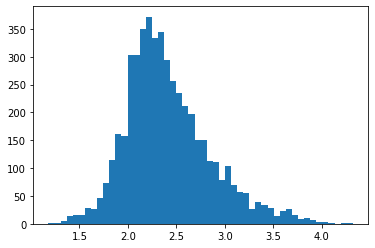

In [ ]:
## Plotting the annotated humor scores in a histogram
# set this threshold in the final function.

import matplotlib.pyplot as plt

# first, figure out the humor scores threshold.
v = list(hum_scores.values())
print(v[:5])

plt.hist(v, 50)
plt.show()

# based on the below exploratory analysis, we probably want to have "humor-threshold" = 2.25 or 2.5
# After iteration 1, I see that 2.25 was way too low. Trying with 3.25.
# The distance threshold is not the right way to measure synonyms. Words with close glove emb's are not necessarily synonyms. Trying with 5.9.


# Inference Script

Run the below in order to apply the silly synonym augmentations to sentences in a file.

Run code in the previous section before starting this one.

In [ ]:
# inference script

### TODO IN THIS CELL: I need to output the original verbs and their indices as well.

import pandas as pd
import csv
import math

### Another idea: maybe we should filter out some sentences based on the grammaticality scoring, before starting this.

#pad the replacement lists, if lengths are different.
def pad_replacements(obj_alts, verb_alts, obj_orig, verb_orig):
  oa1t = obj_orig if len(obj_alts) == 0 else obj_alts[0]
  va1t = verb_orig if len(verb_alts) == 0 else verb_alts[0]
  len_diff = abs(len(obj_alts) - len(verb_alts))
  if len(obj_alts) > len(verb_alts):
    verb_alts.extend([va1t]*len_diff)
  else:
    obj_alts.extend([oa1t]*len_diff)
  return obj_alts, verb_alts

def silly_synonyms_augmentation(input_path, output_path, thresh, n_output):
  # open input path with pandas
  df_mod_data = pd.read_csv(input_path)

  # read the sentence, new word, target word index, and target verb.
  id = df_mod_data['id'].to_list()
  sentences = df_mod_data['sentence'].to_list()
  new_words = df_mod_data['mod_word'].to_list()
  orig_words = df_mod_data['orig_word'].to_list()
  target_word_idxs = df_mod_data['word_id'].to_list()
  target_verbs = df_mod_data['orig_verb'].to_list()

  #### TODO: get rid of "nan" values

  #cycle through the sentences and replace the target verbs.
  # also find a replacement for the "new_words"

  output_ctr = 0
  with open(output_path, 'w') as fout:
    augment_writer = csv.writer(fout)
    augment_writer.writerow(["id", "sentence", "alternate_object", "original_object", "object_idx", "alternate_verb", "original_verb"])  # write the header
    for i, s in enumerate(sentences):
      new_word = new_words[i]
      target_verb = target_verbs[i]

      #### TODO: PACKAGE THESE CHANGES IN A "PREPROCESSING SCRIPT."
      # if "new_word" is nan, skip row.
      if (type(new_word) == float) and (math.isnan(new_word)):
        continue
      #get rid of 'nan' verbs...
      if (type(target_verb) == float) and (math.isnan(target_verb)):
        target_verb = 'asdfasdfasdfasdf'

      # find synonyms
      obj_alts_scores = find_silly_synonyms(new_word, thresh)
      verb_alts_scores = find_silly_synonyms(target_verb, thresh)
      obj_alts = [o[0] for o in obj_alts_scores] 
      verb_alts = [v[0] for v in verb_alts_scores]

      # if both lists empty, skip this sentence. [ALTERNATIVE: JUST PRINT THE SENTENCE UNEDITED...]
      if len(obj_alts) == 0 and len(verb_alts) == 0:
        # [id[i], sentences[i], new_word, orig_words[i], target_word_idxs[i], target_verb, target_verbs[i]] # [just join with previous file.]
        continue

      # since the lengths won't always be the same, be sure to pad them out.
      obj_alts, verb_alts = pad_replacements(obj_alts, verb_alts, new_word, target_verb)
      print("new word:", new_word, ", target verb:", target_verb)
      print("replacements:", obj_alts, verb_alts)

      ### Another potential improvement: try to pair together related silly words before augmenting the sentence with the two selected words.

      sent = sentences[i]
      # write code for this special case later...
      # print(f"[debug] target verb: {target_verb}; new_word: {new_word}")
      if (sent.count(' ' + target_verb + ' ') > 1) or (sent.count(' ' + new_word + ' ') > 1):
        continue
      # try out a couple different replacements.
      for j in range(len(obj_alts)):
        sent0 = sent.replace(' '+target_verb+' ', ' '+verb_alts[j]+' ')  # replace the verb.
        sent0 = sent0.replace(' '+new_word+' ', ' '+obj_alts[j]+' ')  # replace the object.
        out_row = [id[i], sent0, obj_alts[j], orig_words[i], target_word_idxs[i], verb_alts[j], target_verbs[i]] #TODO: add the original verb {+ verb idx?} in here (want to keep punctuation...)
        if i % 20 == 0:  
          print(out_row)
        augment_writer.writerow(out_row)

        output_ctr += 1

      # break off calculation after "n_outputs"
      if output_ctr >= n_output:
        print("output threshold reached!")
        break


#------------------------------------------------#
# actually run the inference script here.
input_path = '/content/gdrive/MyDrive/humor_generation/cbow_news/in_process_data/altered_preds_step1.csv'
output_path = '/content/gdrive/MyDrive/humor_generation/cbow_news/in_process_data/augmented_preds_step2.csv'
thresh=3
n_output = 500 # initially, just to analyze outputs

silly_synonyms_augmentation(input_path, output_path, thresh, n_output)


new word: trump , target verb: striking
replacements: ['trump'] ['surprise']
new word: trump's , target verb: striking
replacements: ["trump's"] ['surprise']
new word: trump , target verb: asked
replacements: ['trump'] ['surprise']
new word: parenthood , target verb: eyes
replacements: ['parenthood', 'parenthood', 'parenthood'] ['grin', 'smile', 'cheek']
new word: trump's , target verb: trickle
replacements: ["trump's"] ['gush']
new word: trump , target verb: trickle
replacements: ['trump'] ['gush']
new word: trump , target verb: visit
replacements: ['trump'] ['trip']
new word: want , target verb: visit
replacements: ['want'] ['trip']
new word: jr , target verb: visit
replacements: ['jr'] ['trip']
new word: trump , target verb: giving
replacements: ['trump'] ['surprise']
new word: shooting , target verb: giving
replacements: ['shooting'] ['surprise']
new word: bill , target verb: fall
replacements: ['bill'] ['surprise']
new word: says , target verb: yank
replacements: ['says', 'says', 